In [1]:
# Magic functions
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import libraries
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
# Create a dictionary of folders and url files
folder_dict = {
    'mtp':'mtp.txt',
    'gd':'gd.txt',
}

In [5]:
# Create folders
for folder in folder_dict.keys():
    path = Path('data/train/')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [7]:
# Download images into folders
for folder, file in folder_dict.items():
    path = Path('data/train/')
    dest = path/folder
    download_images(path/file, dest, max_pics=100)

In [8]:
# Verify and delete if a downloaded image is not in valid format
classes = list(folder_dict.keys())

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

mtp


gd


In [9]:
# Create a DataBunch
np.random.seed(13)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)

In [10]:
len(data.train_ds), len(data.valid_ds)

(147, 36)

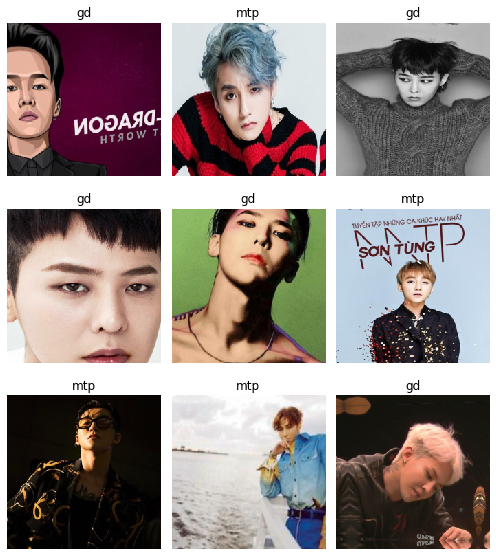

In [11]:
# Have a look at some random images
data.show_batch(rows=3, figsize=(7,8)) 

In [12]:
# Create a model using pre-trained resnet34
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

# Train the model with 4 epoches
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.213228,1.052592,0.611111,00:15
1,0.848883,0.405815,0.861111,00:13
2,0.694086,0.339643,0.861111,00:13
3,0.619776,0.318976,0.888889,00:13


In [13]:
# Save the weights
learn.save('stage-1') 

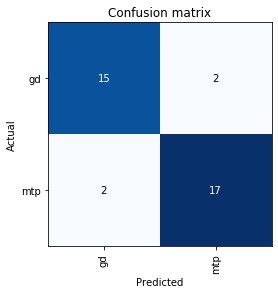

In [14]:
# Plot results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
# Export the model
learn.export()